<a href="https://colab.research.google.com/github/jurreyyahfirdaws-mohammad/INFO7375-Neural-Networks-AI/blob/main/Assignment3_NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib

In [2]:
!pip install tensorflow

In [3]:
!pip install pillow

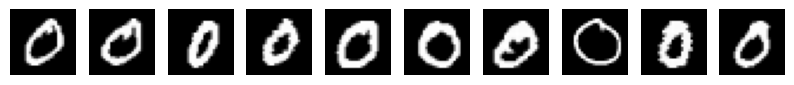

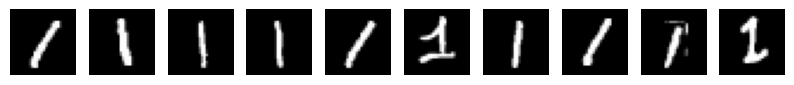

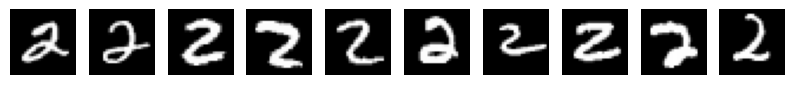

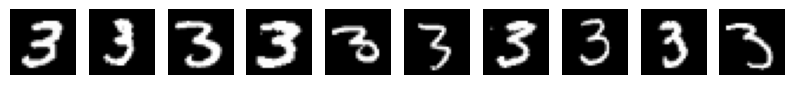

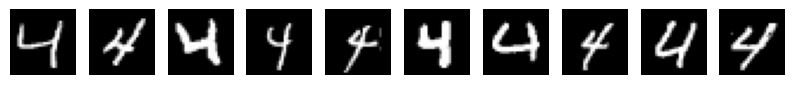

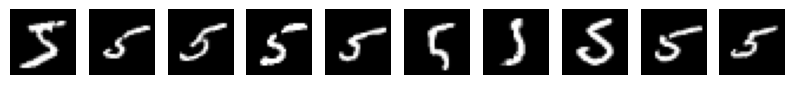

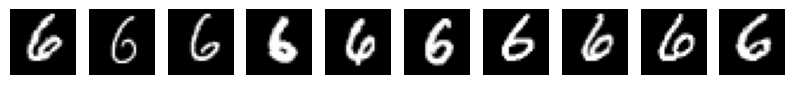

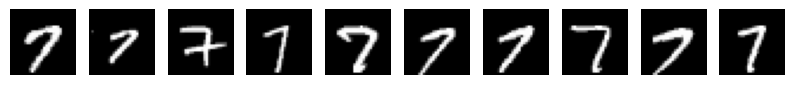

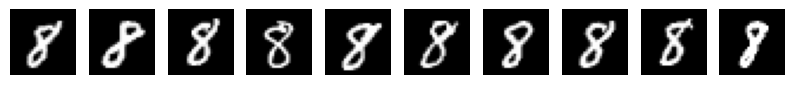

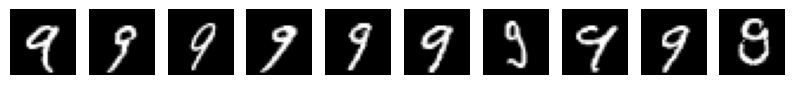

Epoch 0, Loss: 0.30556102313201977
Epoch 100, Loss: 0.23798227482494372
Epoch 200, Loss: 1.9203386093685542e-05
Epoch 300, Loss: 6.4602798537884076e-06
Epoch 400, Loss: 3.4071485811415743e-06
Epoch 500, Loss: 2.1655789498477176e-06
Epoch 600, Loss: 1.5254775151248276e-06
Epoch 700, Loss: 1.1473002139299463e-06
Epoch 800, Loss: 9.02996356465179e-07
Epoch 900, Loss: 7.348274662783242e-07


In [5]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

class Perceptron:
    def __init__(self, input_size):
        # Initialize weights with small random values
        self.weights = np.random.rand(input_size, 1) * 0.01
        # Initialize bias to zero
        self.bias = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Calculate the weighted sum of inputs
        Z = np.dot(X, self.weights) + self.bias
        # Apply the sigmoid activation function
        A = self.sigmoid(Z)
        return A

    def backward(self, X, Y, A, learning_rate):
        # Calculate the gradient of the loss with respect to the weights and bias
        dZ = A - Y
        dW = np.dot(X.T, dZ)
        db = np.sum(dZ)

        # Update the weights and bias using gradient descent
        self.weights -= learning_rate * dW
        self.bias -= learning_rate * db

    def train(self, X, Y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            A = self.forward(X)

            # Compute the mean squared error loss
            loss = np.mean((A - Y) ** 2)

            # Backward pass
            self.backward(X, Y, A, learning_rate)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

def save_images(X_train, y_train, directory="digits"):
    if not os.path.exists(directory):
        os.makedirs(directory)

    for digit in range(10):
        plt.figure(figsize=(10, 1))
        digit_indices = np.where(y_train == digit)[0][:10]

        for i, idx in enumerate(digit_indices):
            img = X_train[idx]
            img_path = f"{directory}/{digit}_{i}.png"
            plt.subplot(1, 10, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.savefig(img_path)

        plt.show()

# Load MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Save images to the 'digits' directory
save_images(X_train, y_train)

# X_train and Y_train
# Generate training data
np.random.seed(42)
X_train = np.random.rand(100, 20 * 20)  # 100 samples, each with 20x20 features
Y_train = np.random.randint(0, 2, (100, 1))  # 0 or 1 labels for binary classification

# Initialize the perceptron with the input size (20 * 20 for our example)
input_size = 20 * 20
perceptron = Perceptron(input_size)

# Train the perceptron
perceptron.train(X_train, Y_train, epochs=1000, learning_rate=0.01)
